# Prepare: authenticate with tranSMART 

Authenticate with tranSMART first if you want to execute any of the analysis in the boxes below again. 

**Step 1**: Please open URL http://localhost:8080/transmart/oauth/authorize?response_type=code&client_id=api-client&client_secret=api-client&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2Ftransmart%2Foauth%2Fverify

**Step 2**: paste token in the token parameter below.

In [1]:
require("transmartRClient")
connectToTransmart("http://localhost:8080/transmart", prefetched.request.token = "4xIZYZ")

Loading required package: transmartRClient
Loading required package: RCurl
Loading required package: bitops
Loading required package: RJSONIO
Loading required package: plyr
Loading required package: RProtoBuf

Attaching package: ‘RProtoBuf’

The following object is masked from ‘package:RCurl’:

    clone

Loading required package: hash
hash-2.2.6 provided by Decision Patterns


Attaching package: ‘hash’

The following object is masked from ‘package:RProtoBuf’:

    clear

Loading required package: reshape

Attaching package: ‘reshape’

The following objects are masked from ‘package:plyr’:

    rename, round_any



Authentication completed.


Connection successful.


If the output above is: Authentication completed. TRUE , 
then you can continue below.

# Get studies and observations data

In [3]:
# Get studies
studies <- getStudies()
studies


,id,api.link.self.href,ontologyTerm.fullName
GSE8581,GSE8581,/studies/gse8581,\Public Studies\GSE8581\


In [4]:
study <- "GSE8581"  

# Retrieve Clinical Data
allObservations <- getObservations(study, as.data.frame = T)
# show first 3 rows, just to get impression of the fields available
allObservations$observations[1:3,]


,subject.id,Biomarker Data_GPL570,Endpoints_Diagnosis,Endpoints_FEV1,Endpoints_Forced Expiratory Volume Ratio,Subjects_Age,Subjects_Height (inch),Subjects_Lung Disease,Subjects_Organism,Subjects_Race,Subjects_Sex
1,1000384597,NA,non-small cell adenocarcinoma,1.41,51,65,66,chronic obstructive pulmonary disease,Homo sapiens,Afro American,female
2,1000384598,E,non-small cell squamous cell carcinoma,1.29,53,77,67,chronic obstructive pulmonary disease,Homo sapiens,Caucasian,female
3,1000384599,E,inflammation,4.04,79,55,69,control,Homo sapiens,Caucasian,male


# Making subsets based on attributes (aka "concepts")

In [5]:
# get the concepts for this study
concepts <- getConcepts(study)
concepts

,name,fullName,type,api.link.self.href,api.link.observations.href,api.link.parent.href,api.link.children.NA.href,api.link.children.NA.title,api.link.highdim.href
1,Afro American,\Public Studies\GSE8581\Subjects\Race\Afro American\,CATEGORICAL_OPTION,/studies/gse8581/concepts/Subjects/Race/Afro%20American,/studies/gse8581/concepts/Subjects/Race/Afro%20American/observations,/studies/gse8581/concepts/Subjects/Race,NA,NA,NA
2,Age,\Public Studies\GSE8581\Subjects\Age\,NUMERIC,/studies/gse8581/concepts/Subjects/Age,/studies/gse8581/concepts/Subjects/Age/observations,/studies/gse8581/concepts/Subjects,NA,NA,NA
3,Biomarker Data,\Public Studies\GSE8581\Biomarker Data\,UNKNOWN,/studies/gse8581/concepts/Biomarker%20Data,/studies/gse8581/concepts/Biomarker%20Data/observations,/studies/gse8581/concepts/ROOT,/studies/gse8581/concepts/Biomarker%20Data/GPL570,GPL570,NA
4,carcinoid,\Public Studies\GSE8581\Endpoints\Diagnosis\carcinoid\,CATEGORICAL_OPTION,/studies/gse8581/concepts/Endpoints/Diagnosis/carcinoid,/studies/gse8581/concepts/Endpoints/Diagnosis/carcinoid/observations,/studies/gse8581/concepts/Endpoints/Diagnosis,NA,NA,NA
5,Caucasian,\Public Studies\GSE8581\Subjects\Race\Caucasian\,CATEGORICAL_OPTION,/studies/gse8581/concepts/Subjects/Race/Caucasian,/studies/gse8581/concepts/Subjects/Race/Caucasian/observations,/studies/gse8581/concepts/Subjects/Race,NA,NA,NA
6,chronic obstructive pulmonary disease,\Public Studies\GSE8581\Subjects\Lung Disease\chronic obstructive pulmonary disease\,CATEGORICAL_OPTION,/studies/gse8581/concepts/Subjects/Lung%20Disease/chronic%20obstructive%20pulmonary%20disease,/studies/gse8581/concepts/Subjects/Lung%20Disease/chronic%20obstructive%20pulmonary%20disease/observations,/studies/gse8581/concepts/Subjects/Lung%20Disease,NA,NA,NA
7,control,\Public Studies\GSE8581\Subjects\Lung Disease\control\,CATEGORICAL_OPTION,/studies/gse8581/concepts/Subjects/Lung%20Disease/control,/studies/gse8581/concepts/Subjects/Lung%20Disease/control/observations,/studies/gse8581/concepts/Subjects/Lung%20Disease,NA,NA,NA
8,Diagnosis,\Public Studies\GSE8581\Endpoints\Diagnosis\,UNKNOWN,/studies/gse8581/concepts/Endpoints/Diagnosis,/studies/gse8581/concepts/Endpoints/Diagnosis/observations,/studies/gse8581/concepts/Endpoints,/studies/gse8581/concepts/Endpoints/Diagnosis/Unknown,Unknown,NA
9,emphysema,\Public Studies\GSE8581\Endpoints\Diagnosis\emphysema\,CATEGORICAL_OPTION,/studies/gse8581/concepts/Endpoints/Diagnosis/emphysema,/studies/gse8581/concepts/Endpoints/Diagnosis/emphysema/observations,/studies/gse8581/concepts/Endpoints/Diagnosis,NA,NA,NA
10,Endpoints,\Public Studies\GSE8581\Endpoints\,UNKNOWN,/studies/gse8581/concepts/Endpoints,/studies/gse8581/concepts/Endpoints/observations,/studies/gse8581/concepts/ROOT,/studies/gse8581/concepts/Endpoints/Forced%20Expiratory%20Volume%20Ratio,Forced Expiratory Volume Ratio,NA


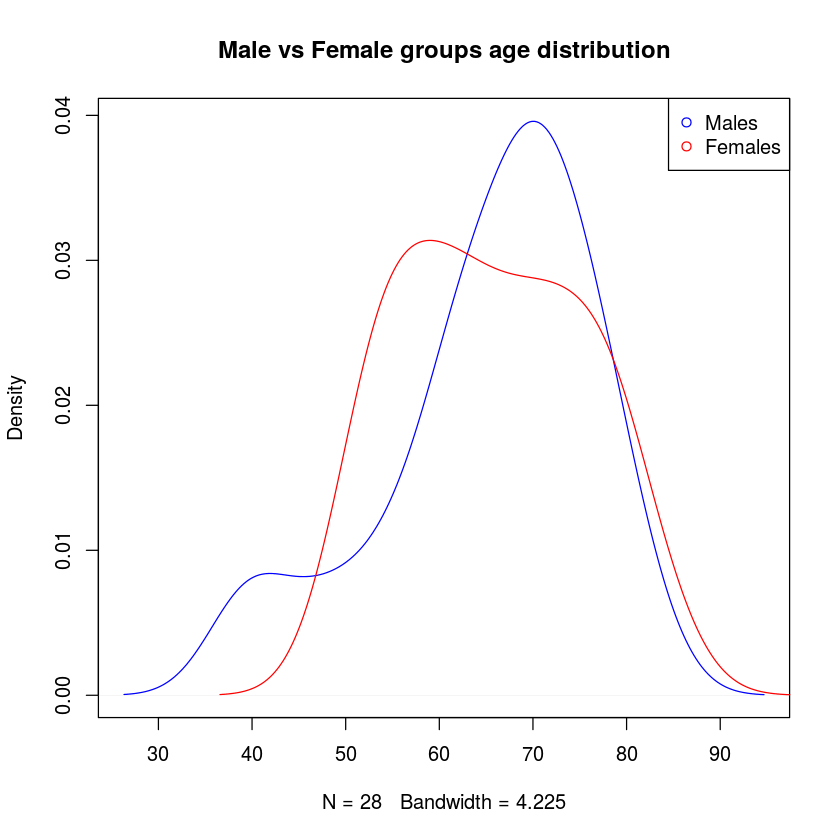

In [6]:
observations <- getObservations(study, 
                                # concept names from api.link.self.href column above: 
                                concept.links =
                                  c("/studies/gse8581/concepts/Subjects/Age",
                                    "/studies/gse8581/concepts/Subjects/Sex")
                                )
# make two groups based on gender :
observations_female <- subset(observations$observations, Sex == 'female')
observations_male <- subset(observations$observations, Sex == 'male')
# show age distribution:
d <- density(as.integer(observations_male$Age)) # returns the density data 
plot(d, col="blue", main="Male vs Female groups age distribution") # plots the results
legend("topright", c("Males","Females"), pch = 1, col=c("blue", "red"))
d <- density(as.integer(observations_female$Age)) # returns the density data 
lines(d, col="red") # plots the results

# Exercise 1

Make a distribution plot similar to the plot above, but now comparing the ages of "control" vs "chronic obstructive pulmonary disease"  (if you did the previous RStudio exercise, you can just paste your code in a code cell below).

NB: run also all necessary cells above to fetch the data that your script requires.

[1] 1

# Downloading the expression data
This can take a while (~1 minute)


In [7]:
dataDownloaded <- getHighdimData(study.name = study, concept.match = "Lung", projection = "log_intensity")


Retrieving data from server. This can take some time, depending on your network connection speed. 2015-10-13 05:36:26


Retrieving data: 
 24.363 MiB downloaded.
Download complete.


Received data for 55 assays. Unpacking data. 2015-10-13 05:37:54


  |======================================================================| 100%


Data unpacked. Converting to data.frame. 2015-10-13 05:38:16
Additional biomarker information is available.
This function will return a list containing a dataframe containing the high dimensional data and a hash describing which (column) labels refer to which bioMarker


In [8]:
summary(dataDownloaded)

                    Length Class      Mode
data                54680  data.frame list
labelToBioMarkerMap 54674  hash       S4  

In [9]:
# preview part of the data
data<-dataDownloaded[["data"]]
data[1:10,1:10]

,assayId,patientId,sampleTypeName,timepointName,tissueTypeName,platform,X235956_at,X226260_x_at,X232632_at,X214503_x_at
1,45741,GSE8581GSM213034,Human,,Lung,GPL570,6.461792,4.969012,5.546975,0.3130368
2,45742,GSE8581GSM212811,Human,,Lung,GPL570,7.461758,1.053695,5.507547,-1.114216
3,45743,GSE8581GSM213036,Human,,Lung,GPL570,6.907191,5.064348,7.637386,0.5699965
4,45744,GSE8581GSM212075,Human,,Lung,GPL570,7.775558,4.766791,6.595917,-0.1566947
5,45745,GSE8581GSM211008,Human,,Lung,GPL570,7.308785,3.559235,8.249853,0.2687817
6,45746,GSE8581GSM210090,Human,,Lung,GPL570,6.286654,4.967538,7.318986,0.1080092
7,45747,GSE8581GSM212855,Human,,Lung,GPL570,4.924318,4.085595,4.552512,1.08789
8,45748,GSE8581GSM212070,Human,,Lung,GPL570,8.0049,4.767745,6.762535,1.19427
9,45749,GSE8581GSM212810,Human,,Lung,GPL570,2.411315,-1.447194,0.2749713,-1.321647
10,45750,GSE8581GSM210193,Human,,Lung,GPL570,6.670685,4.025853,7.538934,0.9389105


# Prepare the data for easy usage in different standard R functions
The steps below show how the table above is processed into a simple table that contains only expression values + an extra feature of having patient identifiers as row names. 

In [10]:
# select gene expression data, which is the data *excluding* columns 1 to 6:
expression_data<-data[,-c(1:6)]
expression_data[1:3,1:3]
dim(expression_data)
# add patientId as the row name for the expression_data matrix:
rownames(expression_data)<-data$patientId
expression_data[1:3,1:3]


,X235956_at,X226260_x_at,X232632_at
1,6.461792,4.969012,5.546975
2,7.461758,1.053695,5.507547
3,6.907191,5.064348,7.637386


[1]    55 54674

,X235956_at,X226260_x_at,X232632_at
GSE8581GSM213034,6.461792,4.969012,5.546975
GSE8581GSM212811,7.461758,1.053695,5.507547
GSE8581GSM213036,6.907191,5.064348,7.637386


# Heatmap 
If the dimensions of the expression_data table are large, you may want to create a subset of the data first. Here we use a probelist as a *subset* for the probes, based on the list found in: "Bhattacharya S., Srisuma S., Demeo D. L., et al.,  Molecular biomarkers for quantitative and discrete COPD phenotypes.American Journal of Respiratory Cell and Molecular Biology. 2009;40(3):359–367. doi: 10.1165/rcmb.2008-0114OC."

In [11]:
#Make a heatmap
probeNames<- c("1552622_s_at","1555318_at","1557293_at","1558280_s_at","1558411_at","1558515_at","1559964_at","204284_at","205051_s_at","205528_s_at","208835_s_at","209377_s_at","209815_at","211548_s_at","212179_at","212263_at","213156_at","213269_at","213650_at","213878_at","215359_x_at","215933_s_at","218352_at","218490_s_at","220094_s_at","220906_at","220925_at","222108_at","224711_at","225318_at","225595_at","225835_at","225892_at","226316_at","226492_at","226534_at","226666_at","226800_at","227095_at","227105_at","227148_at","227812_at","227852_at","227930_at","227947_at","228157_at","228630_at","228665_at","228760_at","228850_s_at","228875_at","228963_at","229111_at","229572_at","230142_s_at","230986_at","232014_at","235423_at","235810_at","238712_at","238992_at","239842_x_at","239847_at","241936_x_at","242389_at")
#note: this is because R automatically prepends "X" in front of column names that start with a numerical value. Therefore prepend "X"
probeNames<- paste("X", probeNames, sep = "") 

In [12]:
# select only the cases and controls (excluding the patients for which the lung disease is not specified). Note: in the observation table the database IDs 
# are used to identify the patients and not the patient IDs that are used in the gene expression dataset
cases <- allObservations$observations$subject.id[allObservations$observations$'Subjects_Lung Disease' == "chronic obstructive pulmonary disease"]
controls <- allObservations$observations$subject.id[allObservations$observations$'Subjects_Lung Disease' == "control"]

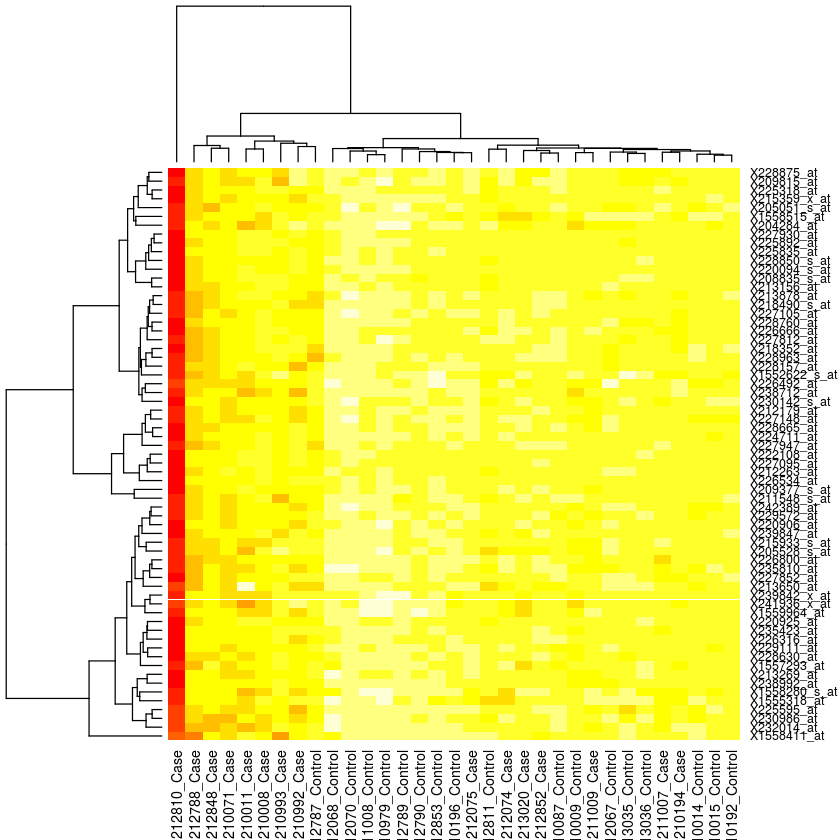

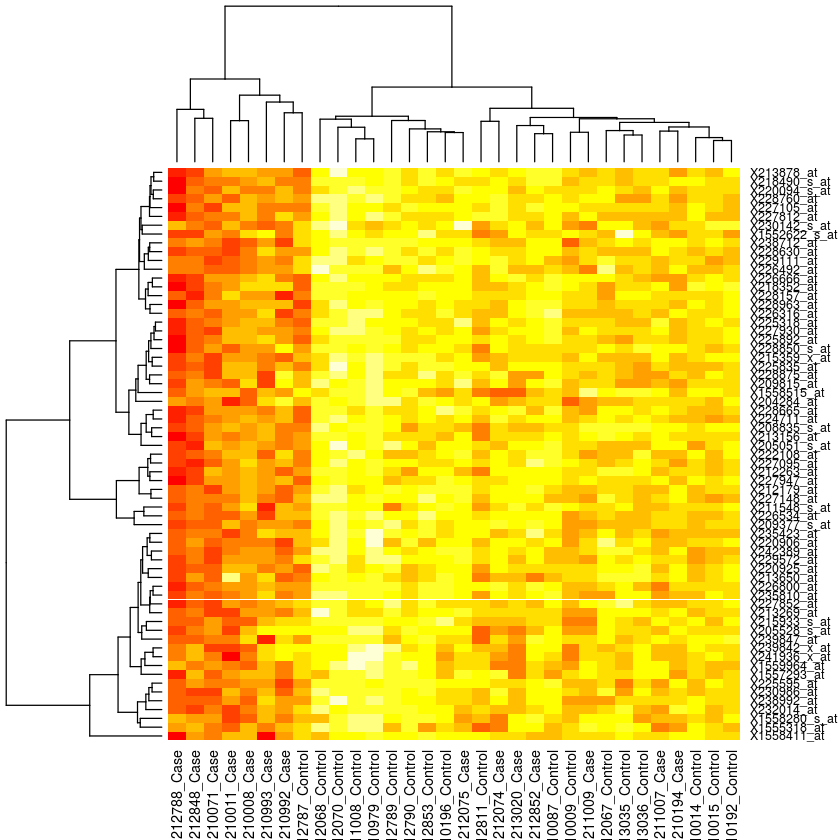

In [13]:
# now we have the *internal database* IDs for the patients, but we need to get the patient IDs because 
# this is the index of the expression_data matrix. 
# These can be retrieved from the subjectInfo table: 
subjectInfo <- allObservations$subjectInfo
patientIDsCase    <- subjectInfo$subject.inTrialId[ subjectInfo$subject.id %in% cases ] 
patientIDsControl <- subjectInfo$subject.inTrialId[ subjectInfo$subject.id %in% controls] 

# patient sets containing case and control patientIDs
patientSets <- c(patientIDsCase, patientIDsControl)
patientSets <- patientSets[which(patientSets %in% rownames(expression_data))]
# make a subset of the data based on the selected patientSets and the probelist, and transpose the 
# table so that the rows now contain probe names
subset<-t(expression_data[patientSets,probeNames]) 
# for ease of recognition: append "Case" and "Control" to the patient names
colnames(subset)[colnames(subset)%in% patientIDsCase] <- paste(colnames(subset)[colnames(subset)%in% patientIDsCase],"Case", sep="_" )
colnames(subset)[colnames(subset)%in% patientIDsControl] <- paste( colnames(subset)[colnames(subset)%in% patientIDsControl] , "Control",sep= "_")

# make heatmap
heatmap(as.matrix(subset), scale = "row")

# there is one patient that seems to be an outlier: GSE8581GSM212810_Case.
# remove this outlier and plot heatmap again
subset_without_outlier <- subset[,colnames(subset)!= "GSE8581GSM212810_Case"]
heatmap(as.matrix(subset_without_outlier), scale = "row")

# PCA visualization

ERROR: Error in loadNamespace(name): there is no package called ‘plot3D’


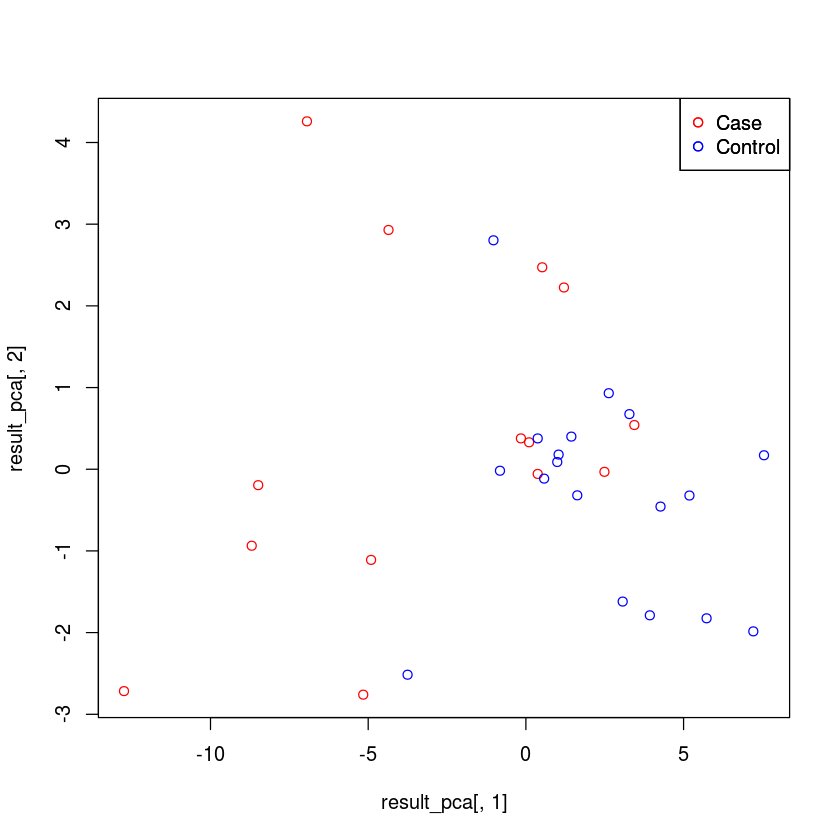

In [14]:
# PCA analysis : 
options(warn=-1)# to turn warnings back on, use : options(warn=0)
subset_t <- t(subset_without_outlier)
prcomp_result <- prcomp(x = subset_t)
result_pca <- prcomp_result$x
#result_pca
rownames_pca_result <- rownames(result_pca)
colors <- c()
for (row in rownames_pca_result){ colors <- c(colors, ifelse(grepl("Case", row), "red", "blue")) }
plot(result_pca[,1], result_pca[,2], col=colors)
legend("topright", c("Case","Control"), pch = 1, col=c("red", "blue"))
#3D
# install.packages("plot3D")
plot3D::scatter3D(result_pca[,1], result_pca[,2], result_pca[,3], col=colors, phi=0, theta=0)
legend("topright", c("Case","Control"), pch = 1, col=c("red", "blue"))


# Exercise 2

Try different phi and theta angles in script above to improve the 3D PCA visualization. Tip: try also 0, 60.